In [1]:
#Тема “Обучение без учителя”
#Задание 1
#Импортируйте библиотеки pandas, numpy и matplotlib.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
#Создайте датафреймы X и y из этих данных.
#Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
#с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, 
#при этом аргумент random_state должен быть равен 42.
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
y = boston.target

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#Масштабируйте данные с помощью StandardScaler. 
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [9]:
#Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


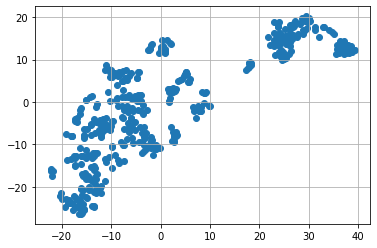

In [11]:
#Постройте диаграмму рассеяния на этих данных.
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.grid()
plt.show()

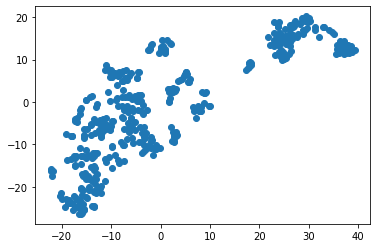

In [23]:

kmeans = KMeans(n_clusters=3)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

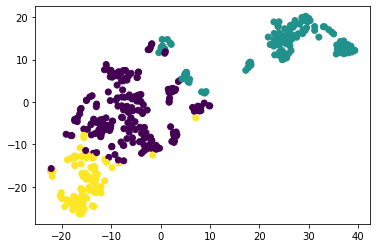

In [44]:
#Задание 2
#С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
from sklearn.cluster import KMeans

#Параметр max_iter должен быть равен 100, random_state сделайте равным 42. Постройте еще раз диаграмму рассеяния 
#на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

kmeans = KMeans(n_clusters=3, max_iter=300, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

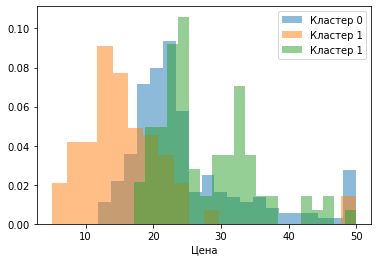

In [45]:
#Вычислите средние значения price и CRIM в разных кластерах.
plt.hist(y_train[labels_train == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 1], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 2], bins=20, density=True, alpha=0.5)

plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 1'])
plt.xlabel('Цена')

plt.show()

In [49]:
print('Cредние значения price - Кластер 0: {}', y_train[labels_train == 0].mean())
print('Cредние значения price - Кластер 1: {}', y_train[labels_train == 1].mean())
print('Cредние значения price - Кластер 2: {}', y_train[labels_train == 2].mean())

Cредние значения price - Кластер 0: {} 24.958115183246072
Cредние значения price - Кластер 1: {} 16.165354330708663
Cредние значения price - Кластер 2: {} 27.78837209302326


In [50]:
print('Криминальность места - Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Криминальность места - Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Криминальность места - Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Криминальность места - Кластер 0: 0.42166020942408367
Криминальность места - Кластер 1: 10.797028425196853
Криминальность места - Кластер 2: 0.07356558139534886


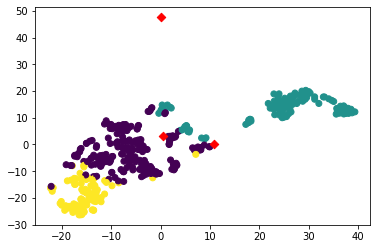

In [28]:
### я хотела получить получившиеся в результате работы алгоритма центры кластеров (как в уроке отметить красным)
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

plt.show()

In [36]:
kmeans.inertia_

3383.905392353137

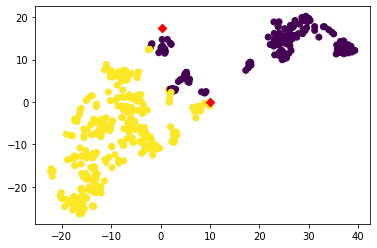

In [31]:
kmeans = KMeans(n_clusters=2, max_iter=300, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

plt.show()

In [32]:
kmeans.inertia_

3383.905392353137

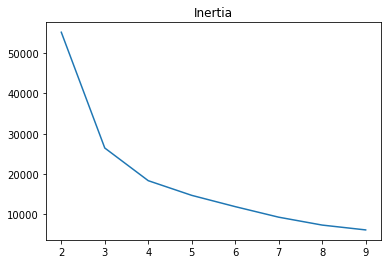

In [34]:
inertias = []

for i in range(2, 10):
    temp_model = KMeans(n_clusters=i, random_state=100)
    temp_model.fit(X_train_tsne)
    
    temp_inertia = temp_model.inertia_
    
    inertias.append(temp_inertia)

plt.plot(range(2, 10), inertias)

plt.title('Inertia')

plt.show()

In [53]:
#*Задание 3
#Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

X_test_tsne = tsne.fit_transform(X_test_scaled)

print('До:\t{}'.format(X_test_scaled.shape))
print('После:\t{}'.format(X_test_tsne.shape))


До:	(102, 13)
После:	(102, 2)


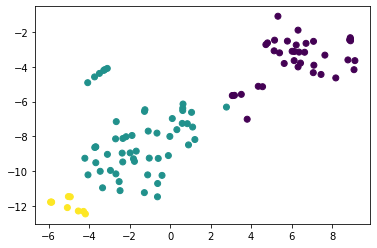

In [58]:
labels_test = kmeans.fit_predict(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)

plt.show()

In [60]:
#Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


590.0622698240078

In [61]:
print('Cредние значения price - Кластер 0: {}', y_test[labels_test == 0].mean())
print('Cредние значения price - Кластер 1: {}', y_test[labels_test == 1].mean())
print('Cредние значения price - Кластер 2: {}', y_test[labels_test == 2].mean())

Cредние значения price - Кластер 0: {} 16.710526315789473
Cредние значения price - Кластер 1: {} 22.690909090909095
Cредние значения price - Кластер 2: {} 34.3111111111111


In [62]:
print('Криминальность места - Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Криминальность места - Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Криминальность места - Кластер 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Криминальность места - Кластер 0: 9.419181842105264
Криминальность места - Кластер 1: 0.21929690909090907
Криминальность места - Кластер 2: 0.04070333333333334
